<a href="https://colab.research.google.com/github/arahmanmdmajid/DS_AI_11/blob/main/Project_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project: Exploratory Data Analysis(EDA) on Food Service Data

The objective of this Project is to analyze a food service dataset to gain insights into operational efficiency and food waste management. The dataset consists of variables such as the number of meals served, kitchen staff, environmental conditions (temperature and humidity), and food waste. Our goal is to explore this data, clean it, visualize key patterns, and derive actionable insights to optimize operations.

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Atomcamp DS&AI Bootcamp 2025/EDA/Food data.csv')
df.head()
display(df.head())
print(df.shape)


,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


(1822, 11)


In [3]:
df.drop(columns=['ID'], inplace=True) #chnages are permanent
df

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
...,...,...,...,...,...,...,...,...,...,...
1817,3/29/2022,395.0,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
1818,11/27/2022,483.0,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
1819,4/12/2023,243.0,11,28.870946,70.508404,2,0,19.767203,Intermediate,MeAt
1820,2/14/2022,406.0,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT


In [4]:
df.duplicated().sum()

np.int64(768)

In [5]:
df.info() #overview of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1822 non-null   object 
 1   meals_served      1790 non-null   float64
 2   kitchen_staff     1804 non-null   object 
 3   temperature_C     1822 non-null   float64
 4   humidity_percent  1806 non-null   float64
 5   day_of_week       1822 non-null   int64  
 6   special_event     1822 non-null   object 
 7   past_waste_kg     1806 non-null   float64
 8   staff_experience  1485 non-null   object 
 9   waste_category    1801 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 142.5+ KB


In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [7]:
df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce').astype('Int64')
df['meals_served'] = pd.to_numeric(df['meals_served'], errors='coerce').astype('Int64')
df['special_event'] = pd.to_numeric(df['special_event'], errors='coerce').astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1822 non-null   datetime64[ns]
 1   meals_served      1790 non-null   Int64         
 2   kitchen_staff     1798 non-null   Int64         
 3   temperature_C     1822 non-null   float64       
 4   humidity_percent  1806 non-null   float64       
 5   day_of_week       1822 non-null   int64         
 6   special_event     1814 non-null   Int64         
 7   past_waste_kg     1806 non-null   float64       
 8   staff_experience  1485 non-null   object        
 9   waste_category    1801 non-null   object        
dtypes: Int64(3), datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 147.8+ KB


In [8]:
df.head()

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


In [9]:
df.describe()

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg
count,1822,1790.0,1798.0,1822.000000,1806.000000,1822.00000,1814.0,1806.000000
mean,2023-04-22 09:30:37.541163520,373.512849,11.9099,22.189280,60.791257,3.01427,0.081588,26.997534
min,2022-01-01 00:00:00,100.0,5.0,-10.372207,30.121111,0.00000,0.0,5.008394
25%,2022-07-25 06:00:00,211.25,8.0,15.684259,46.035158,1.00000,0.0,15.990760
50%,2023-04-23 00:00:00,306.0,12.0,22.115040,61.634935,3.00000,0.0,26.832569
75%,2024-01-07 18:00:00,407.0,15.0,28.807494,75.789317,5.00000,0.0,38.116308
max,2024-09-26 00:00:00,4730.0,19.0,60.000000,89.982828,6.00000,1.0,49.803703
std,NaN,494.791973,4.297856,8.919939,17.326232,2.00899,0.273811,12.791891


In [10]:
df.isnull().sum()

,0
date,0
meals_served,32
kitchen_staff,24
temperature_C,0
humidity_percent,16
day_of_week,0
special_event,8
past_waste_kg,16
staff_experience,337
waste_category,21


In [11]:
for col in df.columns:
  print(f"\nColumn: {col}")
  print(df[col].unique())
  # print(df[col].nunique())
  print(df[col].value_counts())


Column: date
<DatetimeArray>
['2022-12-19 00:00:00', '2023-11-21 00:00:00', '2022-02-01 00:00:00',
 '2023-03-19 00:00:00', '2022-07-18 00:00:00', '2023-03-02 00:00:00',
 '2022-04-18 00:00:00', '2023-12-16 00:00:00', '2023-07-07 00:00:00',
 '2023-11-07 00:00:00',
 ...
 '2024-08-13 00:00:00', '2024-03-16 00:00:00', '2022-12-10 00:00:00',
 '2024-02-09 00:00:00', '2022-05-11 00:00:00', '2024-05-21 00:00:00',
 '2022-03-29 00:00:00', '2022-11-27 00:00:00', '2023-04-12 00:00:00',
 '2024-05-10 00:00:00']
Length: 867, dtype: datetime64[ns]
date
2022-02-02    4
2022-01-11    4
2022-01-27    4
2022-02-14    4
2022-01-06    4
             ..
2024-04-02    2
2023-09-04    2
2024-01-17    2
2024-03-20    2
2022-06-27    2
Name: count, Length: 867, dtype: int64

Column: meals_served
<IntegerArray>
[ 196,  244,  148,  157,  297,  241,  443,  416,  439,  267,
 ...
  449,  298,  369,  327,  145,  117,  182,  281,  395, 2080]
Length: 374, dtype: Int64
meals_served
259     14
352     14
485     14
291   

In [42]:
df.loc[df['staff_experience'] == "intermediate", 'staff_experience'] = "Intermediate"
df.loc[df['staff_experience'] == "EXPERT", 'staff_experience'] = "Expert"
df.loc[df['staff_experience'] == "Pro", 'staff_experience'] = "Expert"

In [43]:
df['staff_experience'].value_counts()

,count
staff_experience,
Intermediate,734
Beginner,381
Expert,370


In [44]:
df.loc[df['waste_category'] == "MEAT", 'waste_category'] = "Meat"
df.loc[df['waste_category'] == "MeAt", 'waste_category'] = "Meat"
df.loc[df['waste_category'] == "dairy", 'waste_category'] = "Dairy"
df.loc[df['waste_category'] == "GRAINS", 'waste_category'] = "Grains"
df.loc[df['waste_category'] == "Barley", 'waste_category'] = "Grains"
df.loc[df['waste_category'] == "Wheat", 'waste_category'] = "Grains"
df['waste_category'].value_counts()

,count
waste_category,
Meat,754
Dairy,351
Vegetables,350
Grains,346


In [12]:
df.columns

Index(['date', 'meals_served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'day_of_week', 'special_event', 'past_waste_kg',
       'staff_experience', 'waste_category'],
      dtype='object')

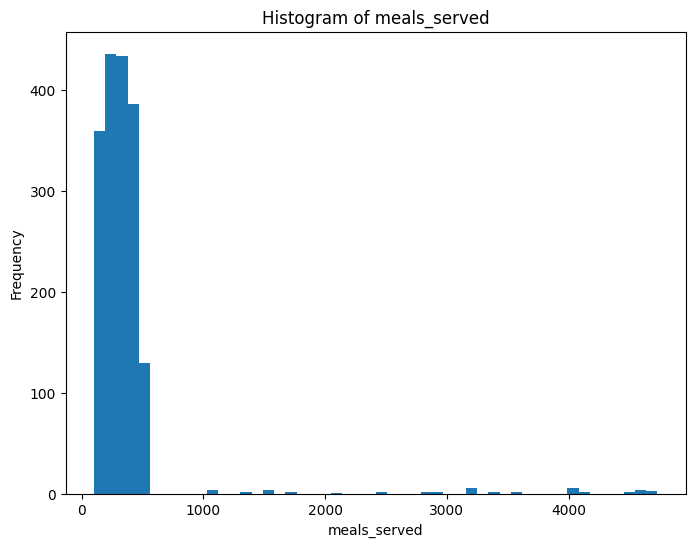

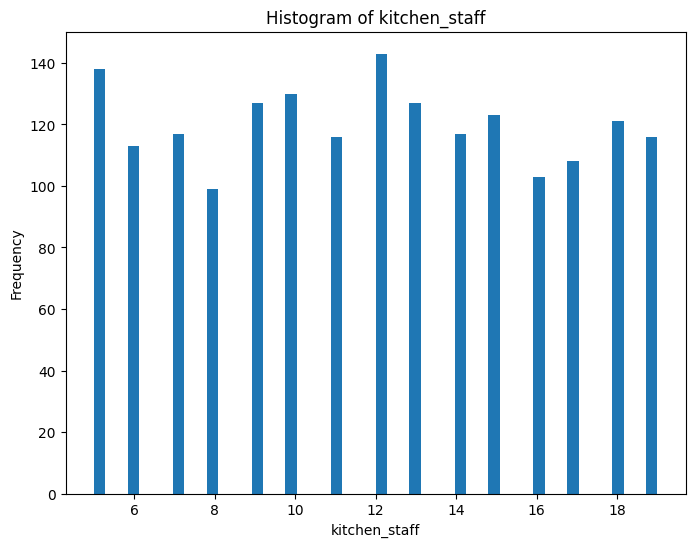

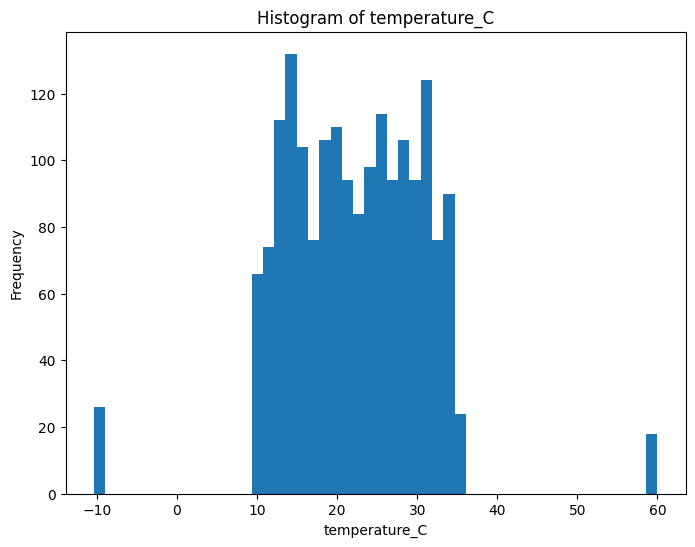

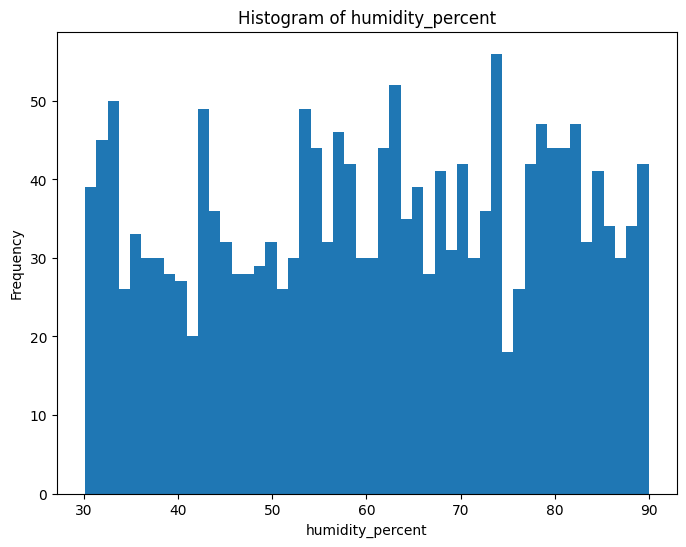

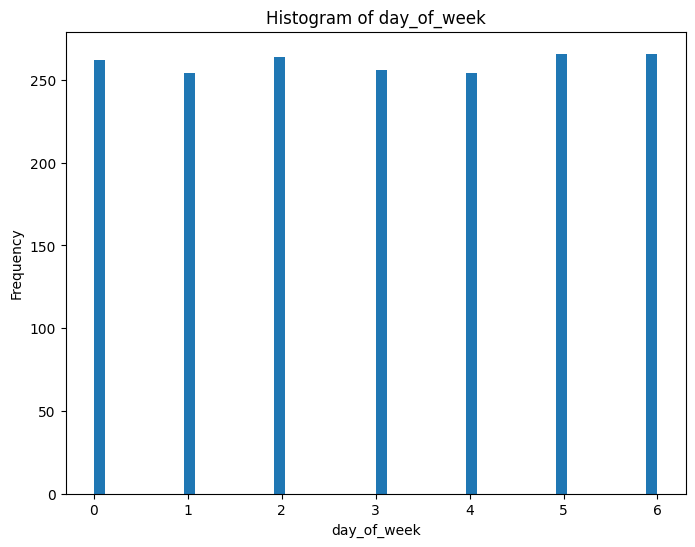

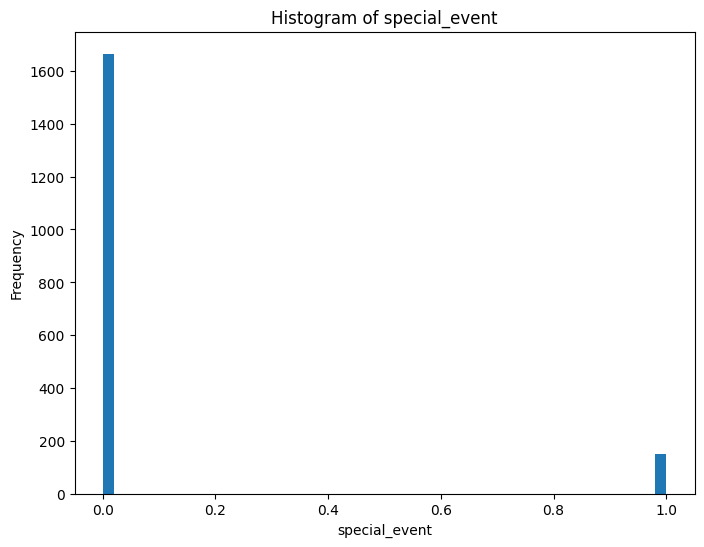

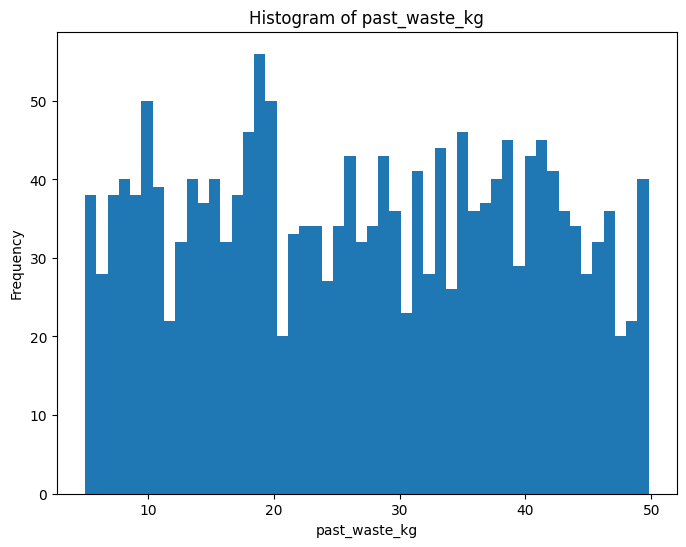

In [15]:
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

for col in numeric_df.columns:
  plt.figure(figsize=(8,6))
  plt.hist(df[col],bins=50)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

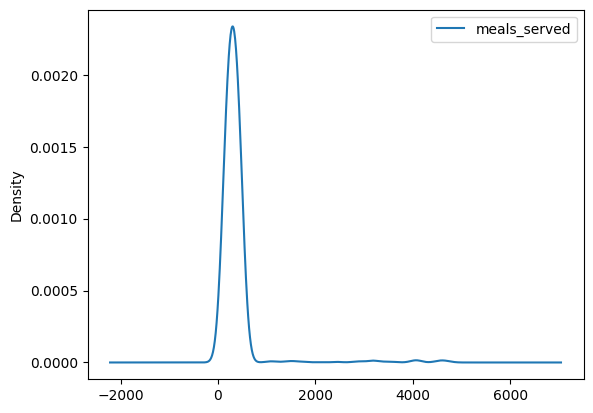

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['meals_served'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [28]:
df['meals_served'].median()

np.float64(306.0)

In [24]:
df['meals_served'].fillna(df['meals_served'].median(), inplace=True)

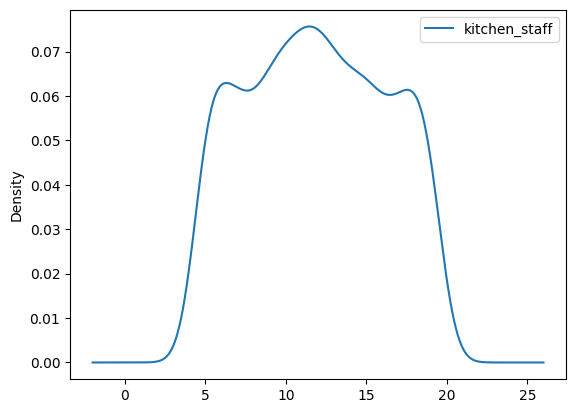

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['kitchen_staff'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [29]:
df['kitchen_staff'].mean()

np.float64(11.909899888765295)

In [31]:
df['kitchen_staff'].fillna(df['kitchen_staff'].mean().astype('int64'), inplace=True)

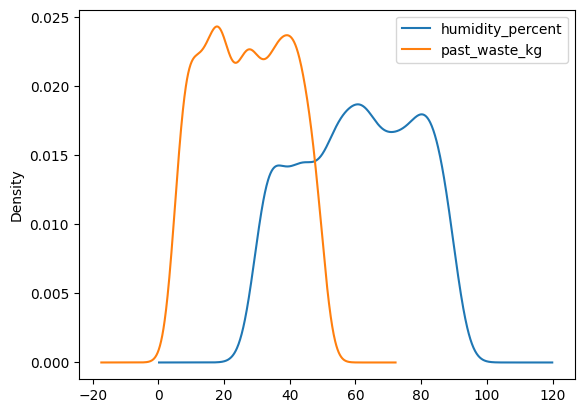

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['humidity_percent'].plot(kind='kde', ax=ax)
df['past_waste_kg'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [38]:
df['humidity_percent'].fillna(df['humidity_percent'].mean(), inplace=True)
df['past_waste_kg'].fillna(df['past_waste_kg'].mean(), inplace=True)

In [48]:
df['special_event'].fillna(df['special_event'].mode()[0], inplace=True)
df['staff_experience'].fillna(df['staff_experience'].mode()[0], inplace=True)
df['waste_category'].fillna(df['waste_category'].mode()[0], inplace=True)

<ipython-input-48-ca70fe9d212a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['special_event'].fillna(df['special_event'].mode()[0], inplace=True)
<ipython-input-48-ca70fe9d212a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [49]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df)

                  Missing Values  Percentage
date                           0         0.0
meals_served                   0         0.0
kitchen_staff                  0         0.0
temperature_C                  0         0.0
humidity_percent               0         0.0
day_of_week                    0         0.0
special_event                  0         0.0
past_waste_kg                  0         0.0
staff_experience               0         0.0
waste_category                 0         0.0


In [53]:
df.duplicated(subset=['date']).sum()

np.int64(955)

In [58]:
df.drop_duplicates(subset=['date'], inplace=True)

In [61]:
# Summary Statistics
df.describe()

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg
count,867,867.0,867.0,867.000000,867.000000,867.000000,867.0,867.000000
mean,2023-05-15 07:20:08.304498432,367.852364,11.913495,22.266040,60.849436,3.010381,0.083045,26.962269
min,2022-01-01 00:00:00,100.0,5.0,-10.372207,30.121111,0.000000,0.0,5.008394
25%,2022-09-06 00:00:00,212.5,8.0,15.731290,46.137809,1.000000,0.0,16.010433
50%,2023-05-17 00:00:00,306.0,12.0,22.362028,61.633960,3.000000,0.0,26.997534
75%,2024-01-19 12:00:00,405.0,15.0,28.753437,75.771143,5.000000,0.0,37.938888
max,2024-09-26 00:00:00,4730.0,19.0,60.000000,89.982828,6.000000,1.0,49.803703
std,NaN,474.101736,4.276866,8.910805,17.247484,2.010052,0.276109,12.769974


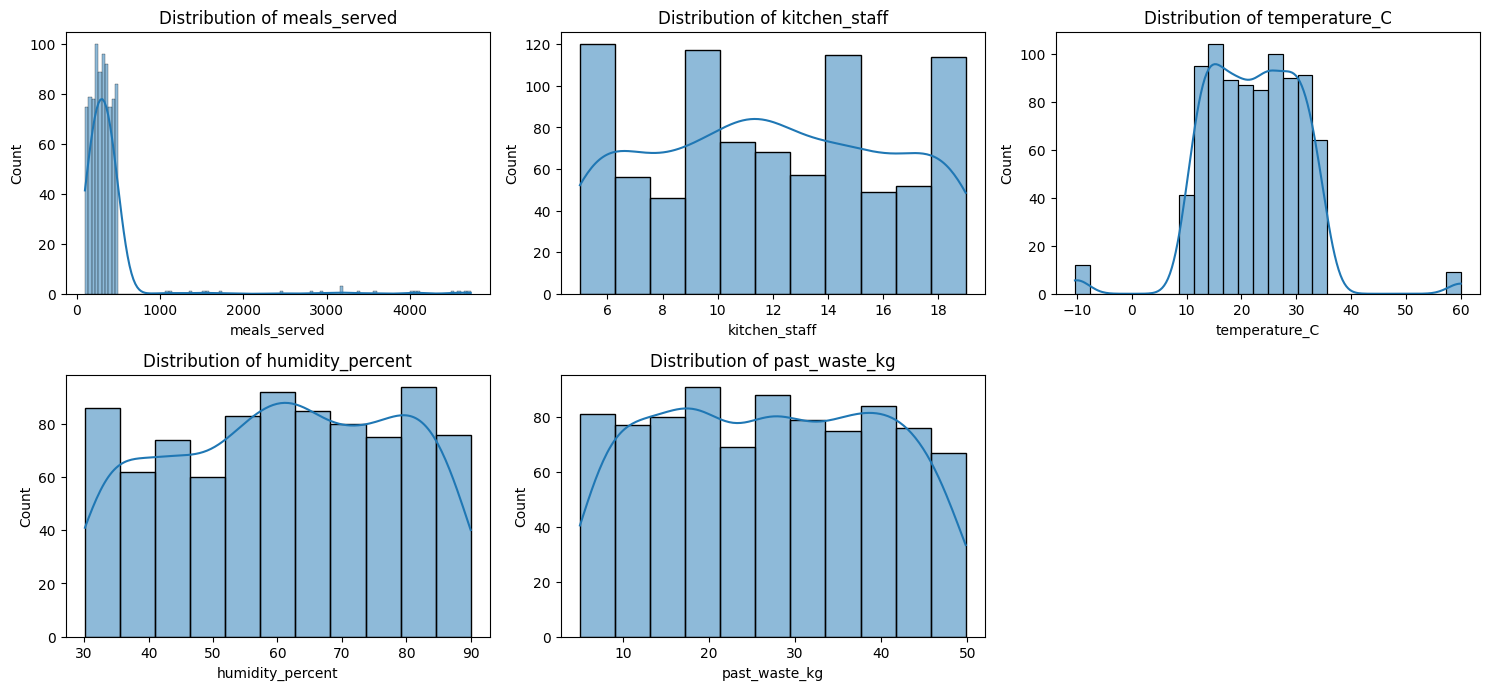

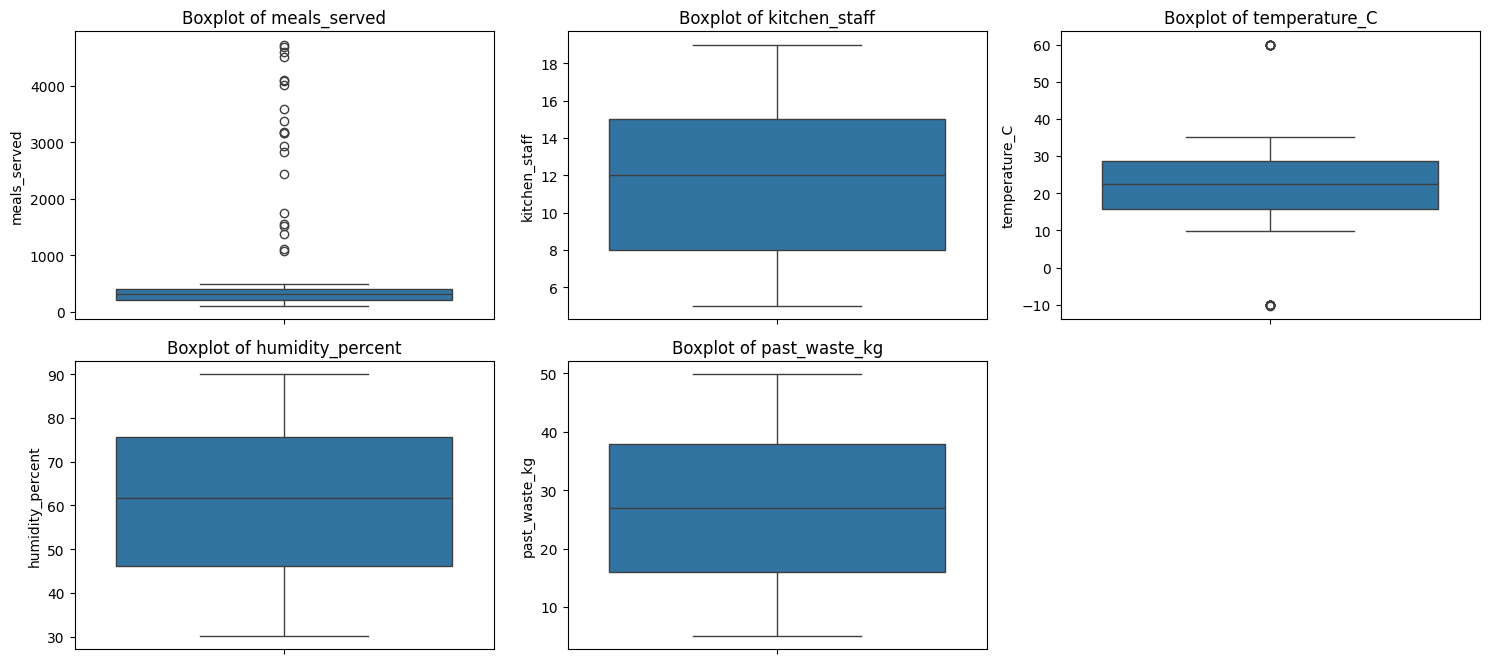

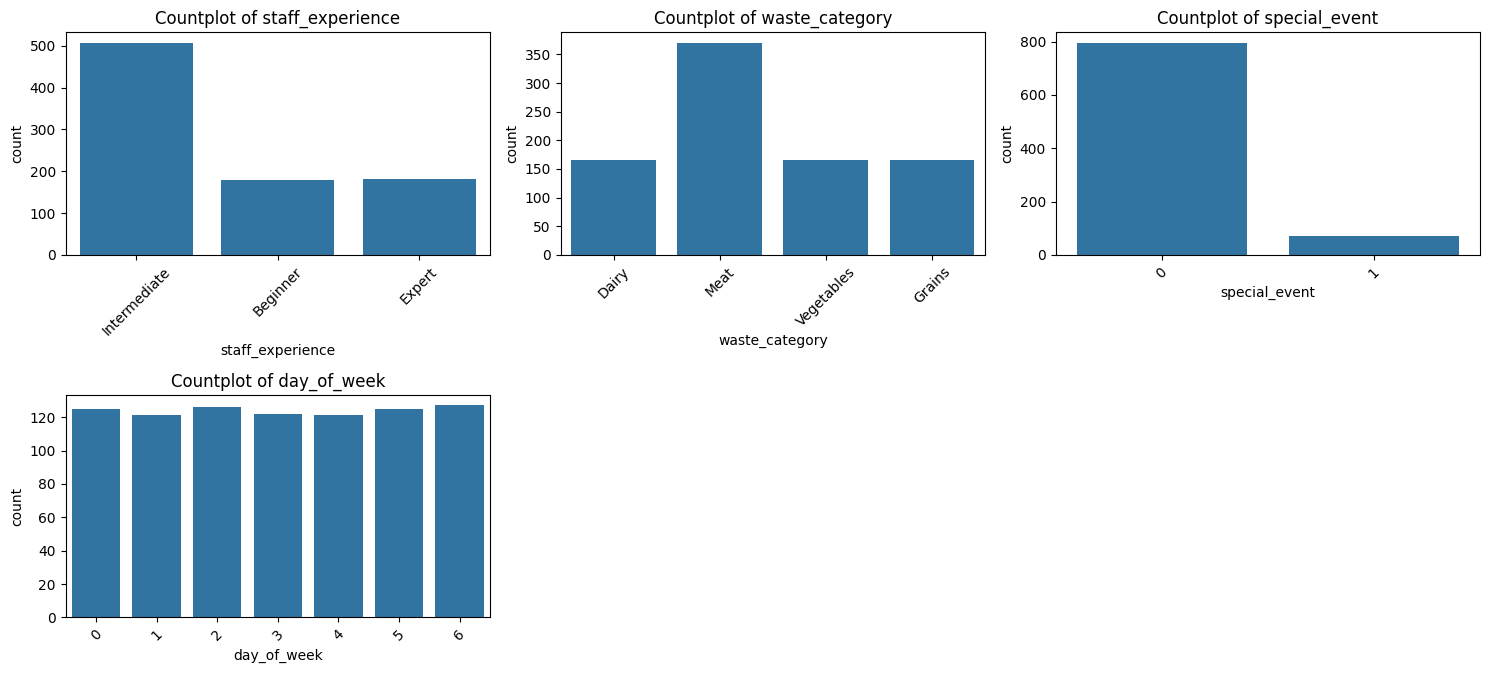

In [67]:
# Visualizing Distributions

import seaborn as sns

numerical_features = ['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent', 'past_waste_kg']
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_features):
  plt.subplot(3,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_features):
  plt.subplot(3,3,i+1)
  sns.boxplot(y=df[col])
  plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,10))
cat_feateaures = ['staff_experience','waste_category','special_event', 'day_of_week']
for i, col in enumerate(cat_feateaures):
  plt.subplot(3,3,i+1)
  sns.countplot(x=df[col])
  plt.xticks(rotation=45)
  plt.title(f"Countplot of {col}")
plt.tight_layout()

In [71]:
df.corr(numeric_only=True)

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg
meals_served,1.000000,-0.002678,-0.006974,-0.045978,0.016988,0.010044,-0.048292
kitchen_staff,-0.002678,1.000000,-0.012241,-0.000581,0.032073,0.028581,-0.081908
temperature_C,-0.006974,-0.012241,1.000000,-0.008476,0.017445,-0.006935,-0.028147
humidity_percent,-0.045978,-0.000581,-0.008476,1.000000,0.021444,0.022973,0.018685
day_of_week,0.016988,0.032073,0.017445,0.021444,1.000000,-0.030684,0.000999
special_event,0.010044,0.028581,-0.006935,0.022973,-0.030684,1.000000,0.005191
past_waste_kg,-0.048292,-0.081908,-0.028147,0.018685,0.000999,0.005191,1.000000


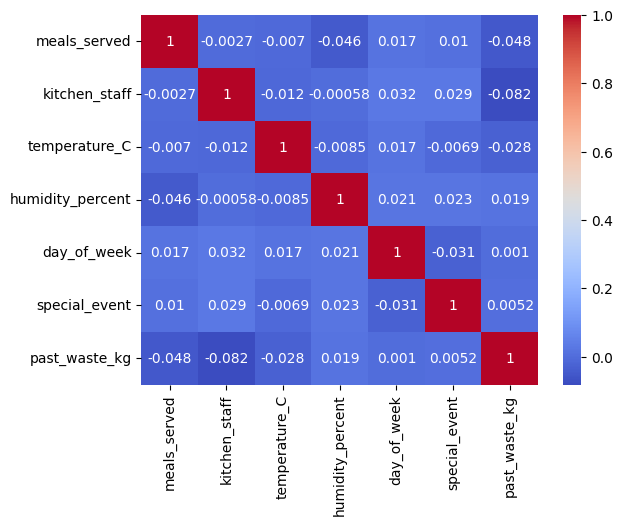

In [70]:
# Correlation Analysis
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [87]:
# Hypothesis Testing
# Impact of Kitchen Staff on Food Waste
# Null hypothesis (H0):: number of kitchen staff affects the amount of food waste.
# Alternative hypothesis (H1): The number of kitchen staff significantly affects food waste.

# If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis.

# cont with cat -> ttest
# cont with cont -> corr
# cat with cat -> chi2

# If we have 2 groups in a cat we will perform t test
# Otherwise if we have more than 2 groups we will perform ANOVA

# So staff_experiencehas more the 2 groups, we will perform the ANOVA test

# we will perform Shapiro Wilk test to check the sanity of the continouts column

from scipy.stats import shapiro, levene, ttest_ind, f_oneway

print('Normality Test -> Shapiro Test for past_waste_kg')
stats, p = shapiro(df['past_waste_kg'])
print( f"Statistics={stats:.3f}, p={p:.03f}")
# print('Shapiro Test for past_waste_kg')
# print(shapiro(df['past_waste_kg']))
alpha = 0.05
if  p > alpha:
  print('Data looks Gaussian (Does not reject H0)\n')
else:
  print('Data does not looks Gaussian (Reject H0)\n')

print("Homogeneity of variance test: Levene test" )
groups=df.groupby('staff_experience')['past_waste_kg']
stats, p = levene(*groups.apply(list))
print(f"Statistics={stats:.3f}, p={p:.03f}")
alpha = 0.05
if  p > alpha:
  print('Variances are equal (fail to reject H0)\n')
else:
  print('Variances are not equal (reject H0)\n')

Normality Test -> Shapiro Test for past_waste_kg
Statistics=0.957, p=0.000
Data does not looks Gaussian (Reject H0)

Homogeneity of variance test: Levene test
Statistics=2.702, p=0.068
Variances are equal (fail to reject H0)



In [78]:
print('Shapiro Test for food waste')
stats, p = shapiro(df['past_waste_kg'])
# print('Shapiro Test for past_waste_kg')
# print(shapiro(df['past_waste_kg']))
alpha = 0.05
if  p > alpha:
  print('Data is normally distributed')
else:
  print('Data is not normally distributed')

Shapiro Test for food waste
Data is not normally distributed


In [75]:
df.groupby('staff_experience')['past_waste_kg'].mean()

,past_waste_kg
staff_experience,
Beginner,28.566400
Expert,26.087328
Intermediate,26.708275


In [86]:
# Hypothesis 1: Does staff experience level impact food waste?
anova_groups = [group['past_waste_kg'].values for name, group in df.groupby('staff_experience')]
anova_result = f_oneway(*anova_groups)
print(f"ANOVA F = {anova_result[0]:.2f}, p = {anova_result[1]:.3f}")



ANOVA F = 1.94, p = 0.144


In [89]:
# Hypothesis 2: Does food waste differ on special event days?

#for this we will perform t-test
event_waste = df[df['special_event'] == 1]['past_waste_kg']
non_event_waste = df[df['special_event'] == 0]['past_waste_kg']
ttest_result = ttest_ind(event_waste, non_event_waste, equal_var=False)

print(f"T-test t = {ttest_result[0]:.2f}, p = {ttest_result[1]:.3f}")


T-test t = 0.15, p = 0.878
